# APS

Code to process, work with and plot APS data to create indicators about skills supply in the UK. 

We are interested in the following indicators:

* Percentage of the population with tertiary education
* Percentage of population employed in professional occupations

Raw collected from https://www.nomisweb.co.uk/articles/676.aspx

See [this table](https://docs.google.com/spreadsheets/d/1V2fAQcvuLsoImwo6uLdyIK3x80pBNoX97CxsxkjvRP4/edit?usp=sharing) for more information.

## Preamble

In [3]:
import requests 

import numpy as np 
import pandas as pd 
import json
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## (Processed) Data Collection

In [4]:
data_edu = '/mnt/c/Users/aotubusen/Documents/DS Projects/nesta_beis/beis-indicators/data/processed/aps/11_11_2019_aps_tertiary_education_data.csv'
data_occupations = '/mnt/c/Users/aotubusen/Documents/DS Projects/nesta_beis/beis-indicators/data/processed/aps/11_11_2019_aps_pro_occupations_data.csv'

In [5]:
df_edu = pd.read_csv(data_edu)
df_edu.set_index('geography_name', inplace=True)
df_edu

,geography_code,date_code,% with NVQ4+ - aged 16-64
geography_name,,,
Bedfordshire and Hertfordshire,UKH2,2012-12,38.1
Bedfordshire and Hertfordshire,UKH2,2013-12,38.2
Bedfordshire and Hertfordshire,UKH2,2014-12,40.0
Bedfordshire and Hertfordshire,UKH2,2015-12,39.9
Bedfordshire and Hertfordshire,UKH2,2016-12,39.8
...,...,...,...
West Yorkshire,UKE4,2014-12,29.2
West Yorkshire,UKE4,2015-12,30.3
West Yorkshire,UKE4,2016-12,29.6


In [7]:
df_edu_2018 = df_edu[df_edu['date_code'] == '2018-12']
df_edu_2018

,geography_code,date_code,% with NVQ4+ - aged 16-64
geography_name,,,
Bedfordshire and Hertfordshire,UKH2,2018-12,40.9
"Berkshire, Buckinghamshire and Oxfordshire",UKJ1,2018-12,48.3
Cheshire,UKD6,2018-12,42.7
Cornwall and Isles of Scilly,UKK3,2018-12,34.8
Cumbria,UKD1,2018-12,31.8
Derbyshire and Nottinghamshire,UKF1,2018-12,33.4
Devon,UKK4,2018-12,36.9
Dorset and Somerset,UKK2,2018-12,34.6
East Anglia,UKH1,2018-12,34.2


Text(0.5, 1.0, 'Percentage of population in NUTS2 regions with NVQ4+')

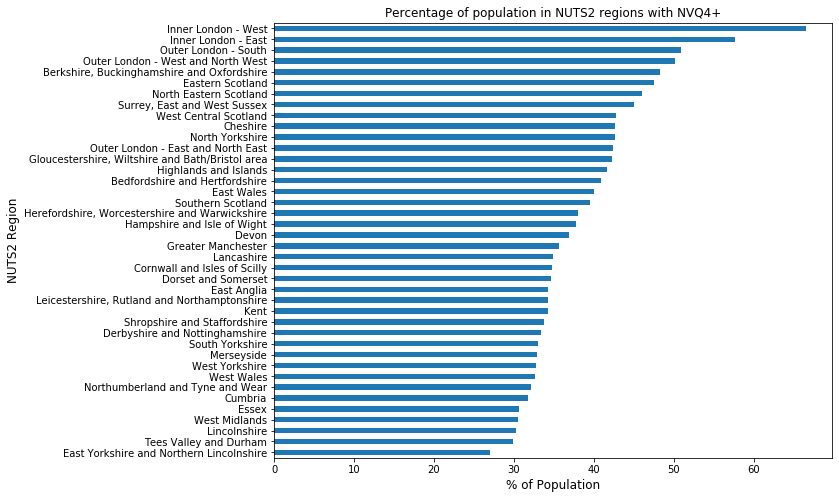

In [25]:
df_edu_2018['% with NVQ4+ - aged 16-64'].sort_values(ascending=True).plot(kind='barh', figsize=(10,8))
plt.ylabel('NUTS2 Region', fontsize=12)
plt.xlabel('% of Population', fontsize=12)
plt.title('Percentage of population in NUTS2 regions with NVQ4+')

In [19]:
df_occ = pd.read_csv(data_occupations)
df_occ.set_index('geography_name', inplace=True)
df_occ

,geography_code,date_code,"% all in employment who are - 1: managers, directors and senior officials (SOC2010)",% all in employment who are - 2: professional occupations (SOC2010),% all in employment who are - 3: associate prof & tech occupations (SOC2010),% all in employment who are - 4: administrative and secretarial occupations (SOC2010),% all in employment who are - 5: skilled trades occupations (SOC2010),"% all in employment who are - 6: caring, leisure and other service occupations (SOC2010)",% all in employment who are - 7: sales and customer service occupations (SOC2010),"% all in employment who are - 8: process, plant and machine operatives (SOC2010)",% all in employment who are - 9: elementary occupations (SOC2010)
geography_name,,,,,,,,,,,
Bedfordshire and Hertfordshire,UKH2,2012-12,11.5,20.8,16.3,11.9,9.9,9.0,7.0,4.9,8.3
Bedfordshire and Hertfordshire,UKH2,2013-12,11.9,22.0,15.4,11.9,10.5,8.3,5.4,6.1,7.9
Bedfordshire and Hertfordshire,UKH2,2014-12,11.7,22.9,15.6,11.6,8.9,8.2,6.8,5.0,9.0
Bedfordshire and Hertfordshire,UKH2,2015-12,10.9,21.3,16.4,10.9,10.9,7.5,7.3,5.1,9.2
Bedfordshire and Hertfordshire,UKH2,2016-12,11.1,21.8,16.1,11.9,9.6,8.3,7.3,5.0,8.7
...,...,...,...,...,...,...,...,...,...,...,...
West Yorkshire,UKE4,2014-12,8.4,17.9,13.9,10.1,10.5,9.3,9.2,7.2,12.7
West Yorkshire,UKE4,2015-12,9.3,18.2,13.1,9.8,10.2,9.5,8.5,8.4,12.0
West Yorkshire,UKE4,2016-12,9.3,19.0,12.7,10.0,10.6,8.3,7.8,8.9,12.6


In [22]:
df_occ_2018 = df_occ[df_occ['date_code'] == '2018-12']
# df_occ_2018

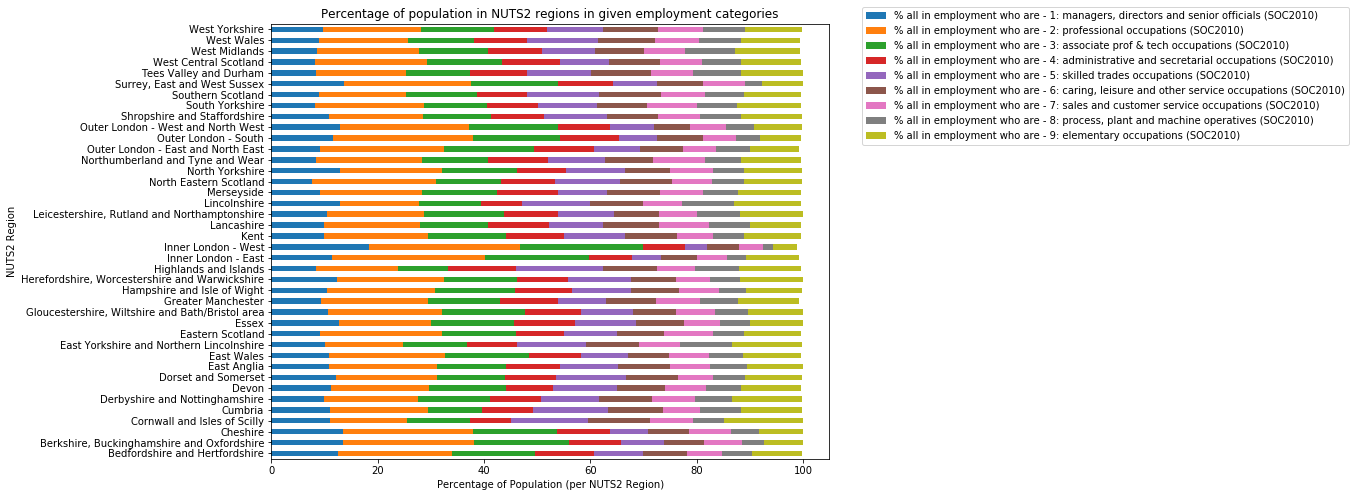

In [24]:
df_occ_2018.plot(kind='barh', figsize=(10,8), stacked=True)
plt.xlabel('Percentage of Population (per NUTS2 Region)')
plt.ylabel('NUTS2 Region')
plt.title('Percentage of population in NUTS2 regions in given employment categories')
plt.legend(bbox_to_anchor=(1.05, 1.05))